In [1]:
!pip install qiskit[all]
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 30.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2b3d2f9a1b46504d77e3b1d3a994280ebb50e366136cf89a51922b9d95ff82f2
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
  Created wheel for p

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

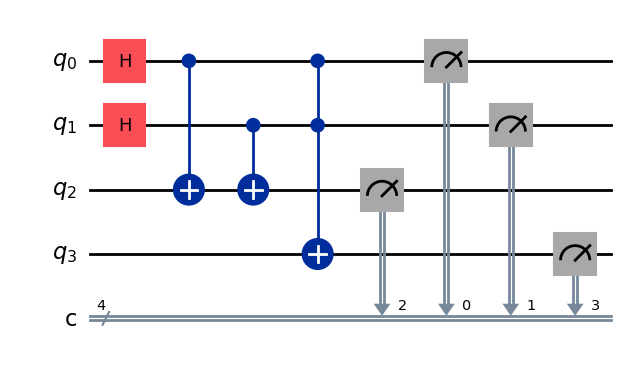

In [11]:
# 양자 회로 생성: 큐비트 4개, 클래식 비트 4개
# - 큐비트 0, 1: 입력값 a, b
# - 큐비트 2: 합 비트 (sum = a XOR b)
# - 큐비트 3: 올림 비트 (carry = a AND b)
# - 클래식 비트 0~3: 측정 결과 저장
qc = QuantumCircuit(4, 4)

# 입력 큐비트 0에 Hadamard 게이트 적용 → |0⟩ → (|0⟩ + |1⟩)/√2
# → 0 또는 1의 상태로 중첩
qc.h(0)

# 입력 큐비트 1에도 Hadamard 게이트 적용 → 중첩 상태 생성
qc.h(1)

# XOR 계산 (sum): a ⊕ b 를 큐비트 2에 저장
# → 두 번의 CNOT으로 XOR 구성: sum = a XOR b
qc.cx(0, 2)  # if a == 1 → sum 반전
qc.cx(1, 2)  # if b == 1 → sum 반전

# AND 계산 (carry): a AND b 를 큐비트 3에 저장
# → CCNOT 게이트 (Toffoli 게이트) 사용
qc.ccx(0, 1, 3)

# 측정: 큐비트 0~3의 상태를 각각 클래식 비트 0~3에 저장
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# 회로 시각화 (matplotlib 스타일)
qc.draw('mpl')

|0⟩ 상태의 두 큐비트에 Hadamard 게이트를 각각 적용하면, 각 큐비트는 (|0⟩ + |1⟩) / √2 상태가 되어 네 가지 조합 (00, 01, 10, 11)의 중첩 상태가 생성된다.
이후 CNOT 게이트를 통해 두 입력 큐비트의 XOR 결과를 세 번째 큐비트(sum 비트)에 계산하고, CCNOT 게이트를 통해 두 큐비트가 모두 1일 때만 네 번째 큐비트(carry 비트)가 1이 되도록 구현한다.
측정 시 각 상태는 확률적으로 “붕괴”하며, 결과는 클래식 비트에 저장된다.
이 회로는 양자 Half Adder의 기본 구조를 따른다.

In [9]:
sim = AerSimulator()
result = sim.run(qc, shots=1000).result() # 회로를 100번 반복 실행하고 결과 반환
counts = result.get_counts() # 각 측정 결과가 몇 번 나왔는지 세어봄
print(counts)

{'1010': 250, '1101': 255, '0110': 253, '0000': 242}


# 회로 단계별 설명
## 1단계: 입력 큐비트 중첩 상태 만들기


```python
qc.h(0)
qc.h(1)
```
- q₀, q₁는 각각 |0⟩에서 시작했는데, H 게이트로 인해 각각 (|0⟩ + |1⟩)/√2 상태가 된다. 즉, 00, 01, 10, 11 네 가지 조합이 동시에 존재하는 중첩 상태가 된다.

## 2단계: Sum 비트 계산 (a XOR b)

```python
qc.cx(0, 2)  # q0 → q2
qc.cx(1, 2)  # q1 → q2
```
- q₂는 XOR 계산을 담을 큐비트. CNOT은 제어 큐비트가 1일 때 대상 큐비트를 뒤집기 때문에 두 번 적용하면 결과는 a XOR b이다.
  -	00 → 0 (둘 다 0 → 변화 없음)
  - 01, 10 → 1 (하나만 1 → 한번 뒤집힘)
  - 11 → 0 (두 번 뒤집힘)

## 3단계: Carry 비트 계산 (a AND b)

```python
qc.ccx(0, 1, 3)  # q0 & q1 → q3
```
- q₃는 Carry 값을 저장할 큐비트. CCNOT(Toffoli) 게이트는 두 제어 큐비트가 모두 1일 때만 대상 큐비트를 뒤집기 때문에 오직 입력이 11일 때만 q₃ = 1.

## 4단계: 측정
```python
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
```
- q₀의 결과를 c2에, q₁의 결과를 c0에, q₂의 결과를 c1에, q₃의 결과를 c3에 저장